In [1]:
x=1

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

# Some plotting aesthetics
%matplotlib inline

# sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['figure.dpi'] = 100

In [3]:
hlca = sc.read('../../../pipeline/data/pp/hlca_healthy_ipf_balanced_ipf_signature_genes.h5ad')
hlca

AnnData object with n_obs × n_vars = 450214 × 2020
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_le

In [5]:
hlca.layers['counts'].data

array([4., 1., 1., ..., 1., 2., 3.], dtype=float32)

In [6]:
hlca.X = hlca.layers['counts'].copy()

In [7]:
sc.pp.normalize_total(hlca, target_sum=1e4)

In [8]:
sc.pp.log1p(hlca)

In [9]:
hlca.var_names

Index(['ENSG00000176890', 'ENSG00000140932', 'ENSG00000019169',
       'ENSG00000104904', 'ENSG00000119655', 'ENSG00000106483',
       'ENSG00000174175', 'ENSG00000118785', 'ENSG00000204711',
       'ENSG00000164047',
       ...
       'ENSG00000168386', 'ENSG00000198832', 'ENSG00000140937',
       'ENSG00000143556', 'ENSG00000197728', 'ENSG00000143387',
       'ENSG00000120738', 'ENSG00000125968', 'ENSG00000211651',
       'ENSG00000134827'],
      dtype='object', name='ensembl_id', length=2020)

In [10]:
ipf_genes = {
    'BST2': 'ENSG00000130303', #
    'CMPK2': 'ENSG00000134326',
    'EIF2AK2': 'ENSG00000055332',
    'EPSTI1': 'ENSG00000133106',
    'HERC5': 'ENSG00000138646',
    'IFI35': 'ENSG00000068079',
    'IFI44L': 'ENSG00000137959',
    'IFI6': 'ENSG00000126709', #
    'IFIT3': 'ENSG00000119917', #
    'ISG15': 'ENSG00000187608', #
    'LY6E': 'ENSG00000160932',
    'MX1': 'ENSG00000157601',
    'MX2': 'ENSG00000183486',
    'OAS1': 'ENSG00000089127',
    'OAS2': 'ENSG00000111335',
    'PARP9': 'ENSG00000138496',
    'PLSCR1': 'ENSG00000188313',
    'SAMD9': 'ENSG00000205413',
    'SAMD9L': 'ENSG00000177409',
    'SP110': 'ENSG00000135899',
    'STAT1': 'ENSG00000115415',
    'TRIM22': 'ENSG00000132274',
    'UBE2L6': 'ENSG00000156587',
    'XAF1': 'ENSG00000132530',
    'IRF7': 'ENSG00000185507',
}

In [11]:
adata = sc.read('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/adata.h5ad')
adata

AnnData object with n_obs × n_vars = 450214 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


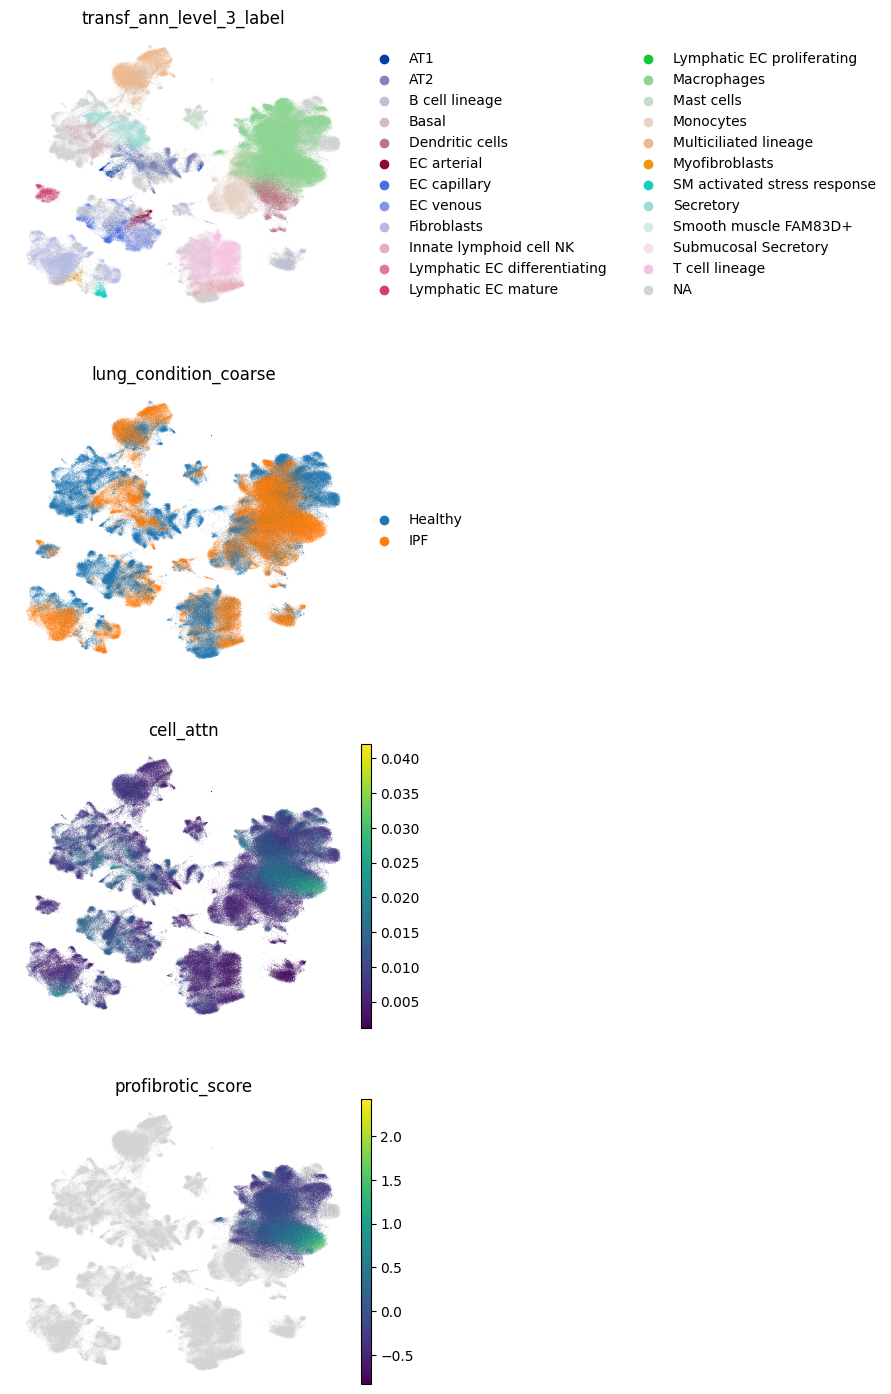

In [12]:
sc.pl.umap(
    adata,
    color=['transf_ann_level_3_label', 'lung_condition_coarse', 'cell_attn', 'profibrotic_score'],
    ncols=1,
    frameon=False
)

In [13]:
adata_subset = hlca[adata[adata.obs['transf_ann_level_1_label'].isin(['Stroma', 'Epithelial'])].obs_names].copy()
adata_subset.obs['cell_attn'] = adata[adata_subset.obs_names].obs['cell_attn']
adata_subset

AnnData object with n_obs × n_vars = 97570 × 2020
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_lev

In [14]:
set(ipf_genes.values()).intersection(set(adata_subset.var_names))

{'ENSG00000055332',
 'ENSG00000068079',
 'ENSG00000089127',
 'ENSG00000111335',
 'ENSG00000115415',
 'ENSG00000119917',
 'ENSG00000126709',
 'ENSG00000130303',
 'ENSG00000132274',
 'ENSG00000132530',
 'ENSG00000133106',
 'ENSG00000134326',
 'ENSG00000135899',
 'ENSG00000137959',
 'ENSG00000138496',
 'ENSG00000138646',
 'ENSG00000156587',
 'ENSG00000157601',
 'ENSG00000177409',
 'ENSG00000183486',
 'ENSG00000185507',
 'ENSG00000187608',
 'ENSG00000188313',
 'ENSG00000205413'}

In [15]:
sc.tl.score_genes(adata_subset, gene_list=list(ipf_genes.values()), score_name='ipf_score')

In [16]:
adata.obs['ipf_score'] = np.nan
adata.obs.loc[adata_subset.obs_names, 'ipf_score'] = adata_subset.obs['ipf_score']

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


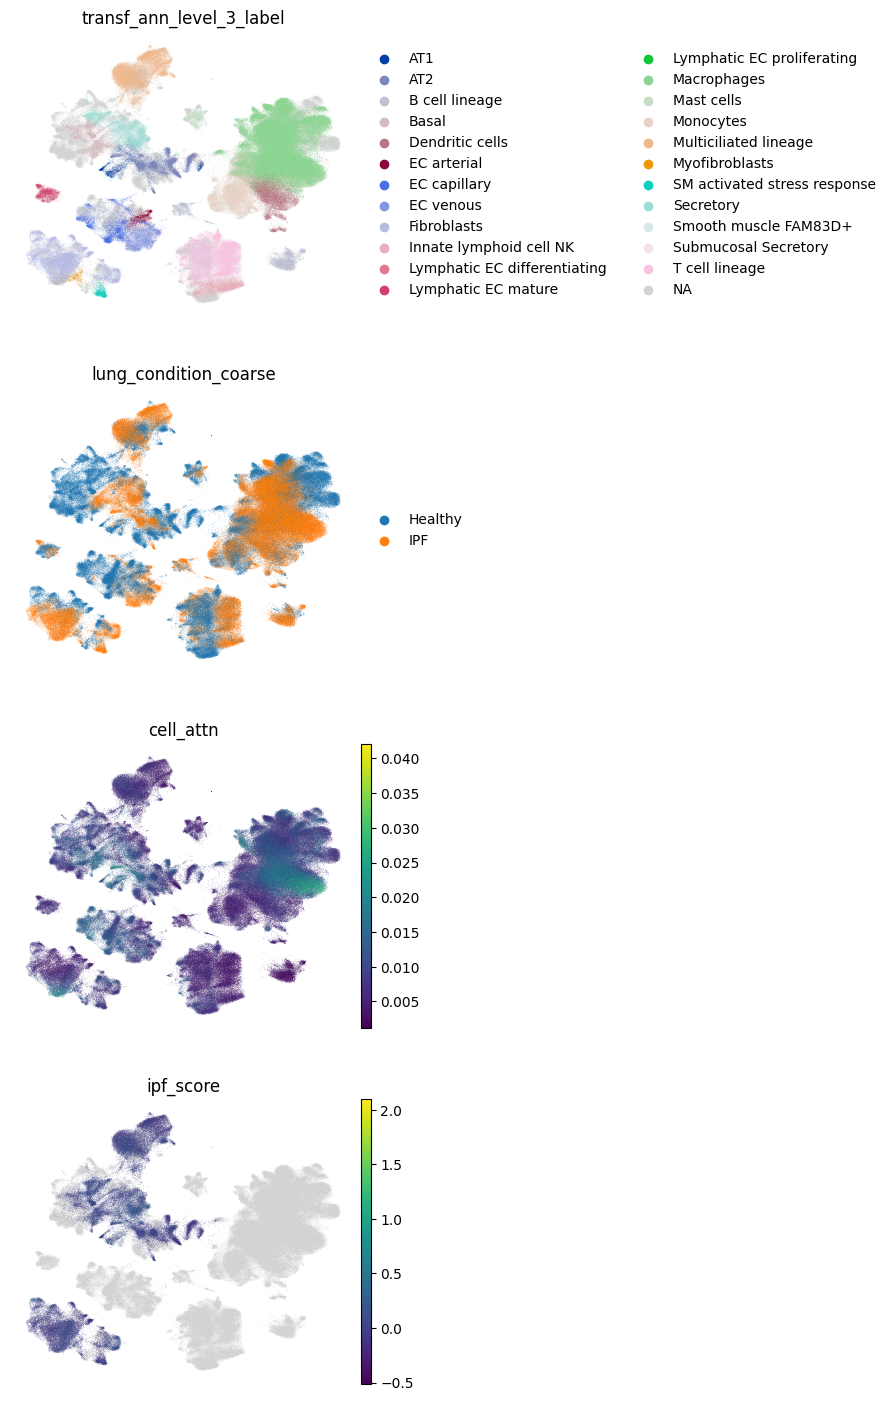

In [17]:
sc.pl.umap(
    adata,
    color=['transf_ann_level_3_label', 'lung_condition_coarse', 'cell_attn', 'ipf_score'],
    ncols=1,
    frameon=False
)

Alveolar epithelium, fibroblasts, club, basal

In [18]:
np.unique(adata_subset.obs['transf_ann_level_3_label'])

array(['AT1', 'AT2', 'B cell lineage', 'Basal', 'EC capillary',
       'EC venous', 'Fibroblasts', 'Lymphatic EC mature', 'Macrophages',
       'Mast cells', 'Monocytes', 'Multiciliated lineage',
       'Myofibroblasts', 'SM activated stress response', 'Secretory',
       'Smooth muscle FAM83D+', 'Submucosal Secretory', 'T cell lineage'],
      dtype=object)

# Basal

In [19]:
basal = adata[adata.obs['transf_ann_level_3_label'] == 'Basal'].copy()
basal

AnnData object with n_obs × n_vars = 11425 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


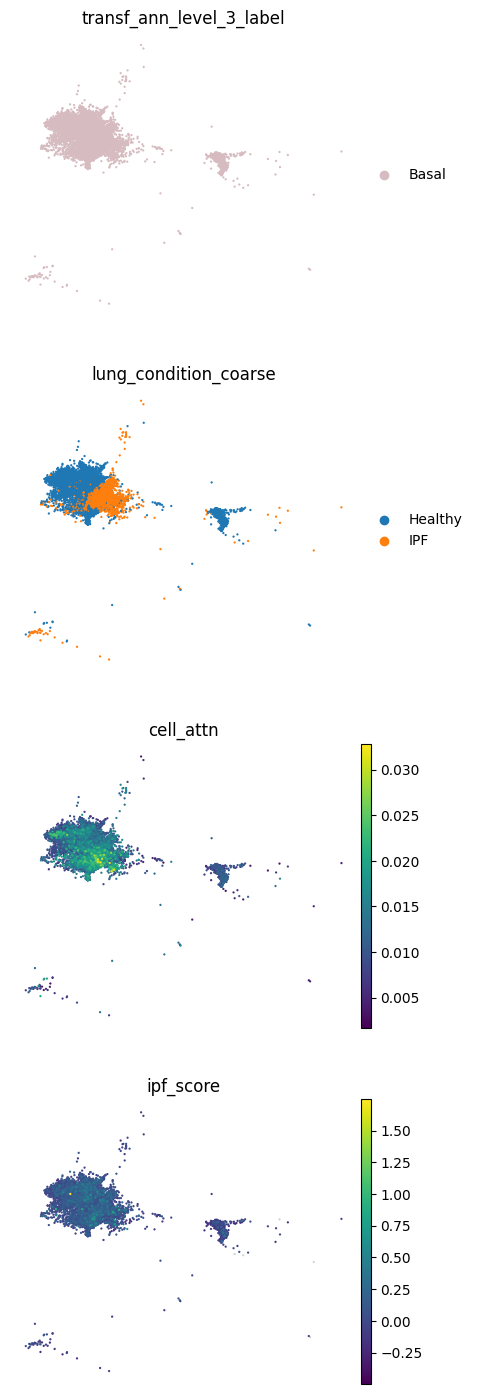

In [20]:
sc.pl.umap(
    basal,
    color=['transf_ann_level_3_label', 'lung_condition_coarse', 'cell_attn', 'ipf_score'],
    ncols=1,
    frameon=False
)

In [35]:
basal_genes = hlca[hlca.obs['transf_ann_level_3_label'] == 'Basal'].copy()
basal_genes.obsm['X_umap'] = basal.obsm['X_umap'].copy()
basal_genes.obs = basal_genes.obs.join(basal.obs[['lung_condition_coarse', 'cell_attn', 'ipf_score']])
basal_genes

AnnData object with n_obs × n_vars = 11425 × 2020
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_lev

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


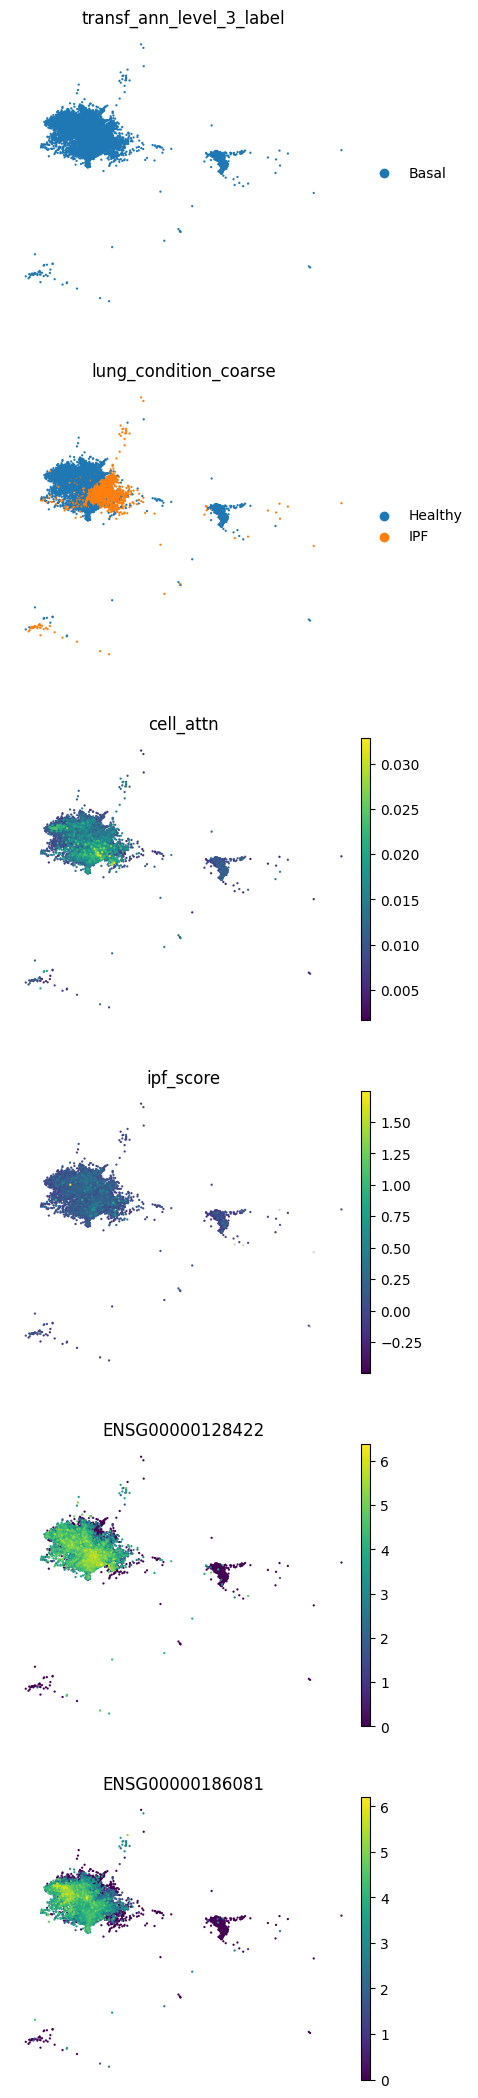

In [54]:
sc.pl.umap(
    basal_genes,
    color=['transf_ann_level_3_label', 'lung_condition_coarse', 'cell_attn', 'ipf_score', 'ENSG00000128422', 'ENSG00000186081'],
    ncols=1,
    frameon=False
)

In [38]:
threshold_idx = int(len(basal_genes) * 0.9)
threshold_value = sorted(basal_genes.obs['cell_attn'])[threshold_idx]
threshold_value

0.015968304127454758

In [39]:
basal_top = basal_genes[basal_genes.obs['cell_attn'] >= threshold_value].copy()
basal_top

AnnData object with n_obs × n_vars = 1143 × 2020
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [44]:
df1 = pd.DataFrame(basal_top[:, 'ENSG00000128422'].X.A, columns=['KRT17'])
df1.loc[:, 'group'] = 'top 10% cells'
df2 = pd.DataFrame(basal_genes[:, 'ENSG00000128422'].X.A, columns=['KRT17'])
df2.loc[:, 'group'] = 'all cells'
df = pd.concat([df1, df2])
df

,KRT17,group
0,2.954998,top 10% cells
1,3.020092,top 10% cells
2,5.029417,top 10% cells
3,3.821987,top 10% cells
4,4.549372,top 10% cells
...,...,...
11420,0.000000,all cells
11421,0.000000,all cells
11422,3.950098,all cells
11423,5.084578,all cells


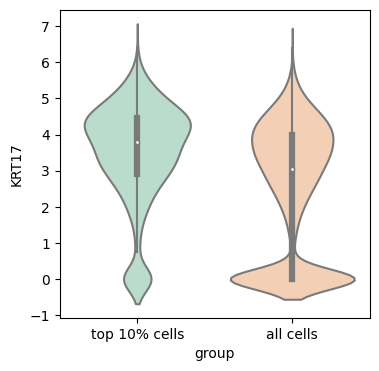

In [45]:
sns.violinplot(x="group", y="KRT17", data=df, palette="Pastel2")
plt.show()

In [46]:
from scipy.stats import ttest_ind

In [48]:
ttestresult = ttest_ind(df1['KRT17'], df2['KRT17'])

In [49]:
ttestresult.pvalue

3.0709809000679562e-74

In [50]:
df1 = pd.DataFrame(basal_top[basal_top.obs['lung_condition_coarse'] == 'IPF'][:, 'ENSG00000128422'].X.A, columns=['KRT17'])
df1.loc[:, 'group'] = 'top 10% cells'
df2 = pd.DataFrame(basal_genes[basal_genes.obs['lung_condition_coarse'] == 'IPF'][:, 'ENSG00000128422'].X.A, columns=['KRT17'])
df2.loc[:, 'group'] = 'all cells'
df = pd.concat([df1, df2])
df

,KRT17,group
0,3.020092,top 10% cells
1,5.029417,top 10% cells
2,3.821987,top 10% cells
3,4.027974,top 10% cells
4,5.179309,top 10% cells
...,...,...
3871,3.304244,all cells
3872,3.021948,all cells
3873,4.271163,all cells
3874,3.950098,all cells


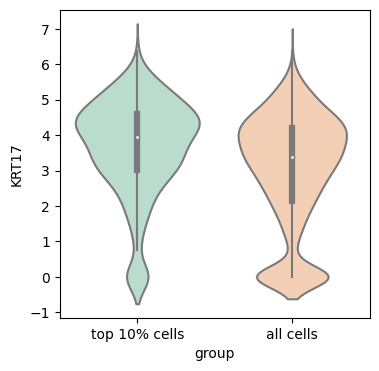

In [51]:
sns.violinplot(x="group", y="KRT17", data=df, palette="Pastel2")
plt.show()

In [52]:
ttestresult = ttest_ind(df1['KRT17'], df2['KRT17'])

In [53]:
ttestresult.pvalue

1.3100752288437018e-21

# Fibroblasts

In [21]:
fibro = adata[adata.obs['transf_ann_level_3_label'] == 'Fibroblasts'].copy()
fibro

AnnData object with n_obs × n_vars = 25808 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


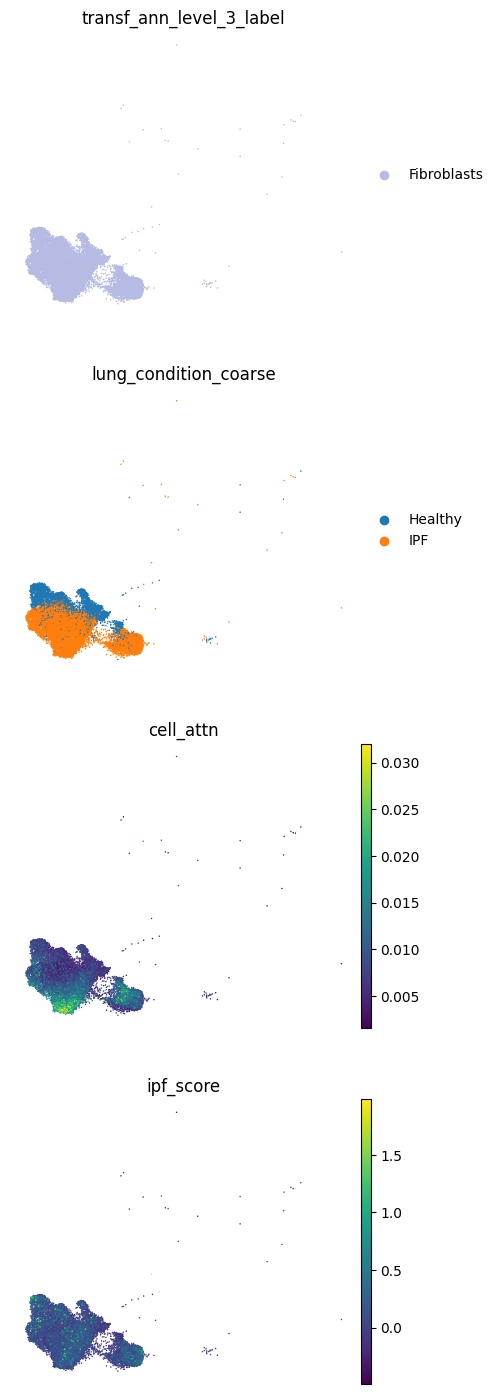

In [22]:
sc.pl.umap(
    fibro,
    color=['transf_ann_level_3_label', 'lung_condition_coarse', 'cell_attn', 'ipf_score'],
    ncols=1,
    frameon=False
)

In [23]:
adata_subset.obsm['latent'] = adata[adata_subset.obs_names].X.copy()
adata_subset

AnnData object with n_obs × n_vars = 97570 × 2020
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_lev

In [24]:
sc.pp.neighbors(adata_subset, use_rep='latent')

In [25]:
sc.tl.leiden(adata_subset)

In [26]:
sc.tl.umap(adata_subset)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = s

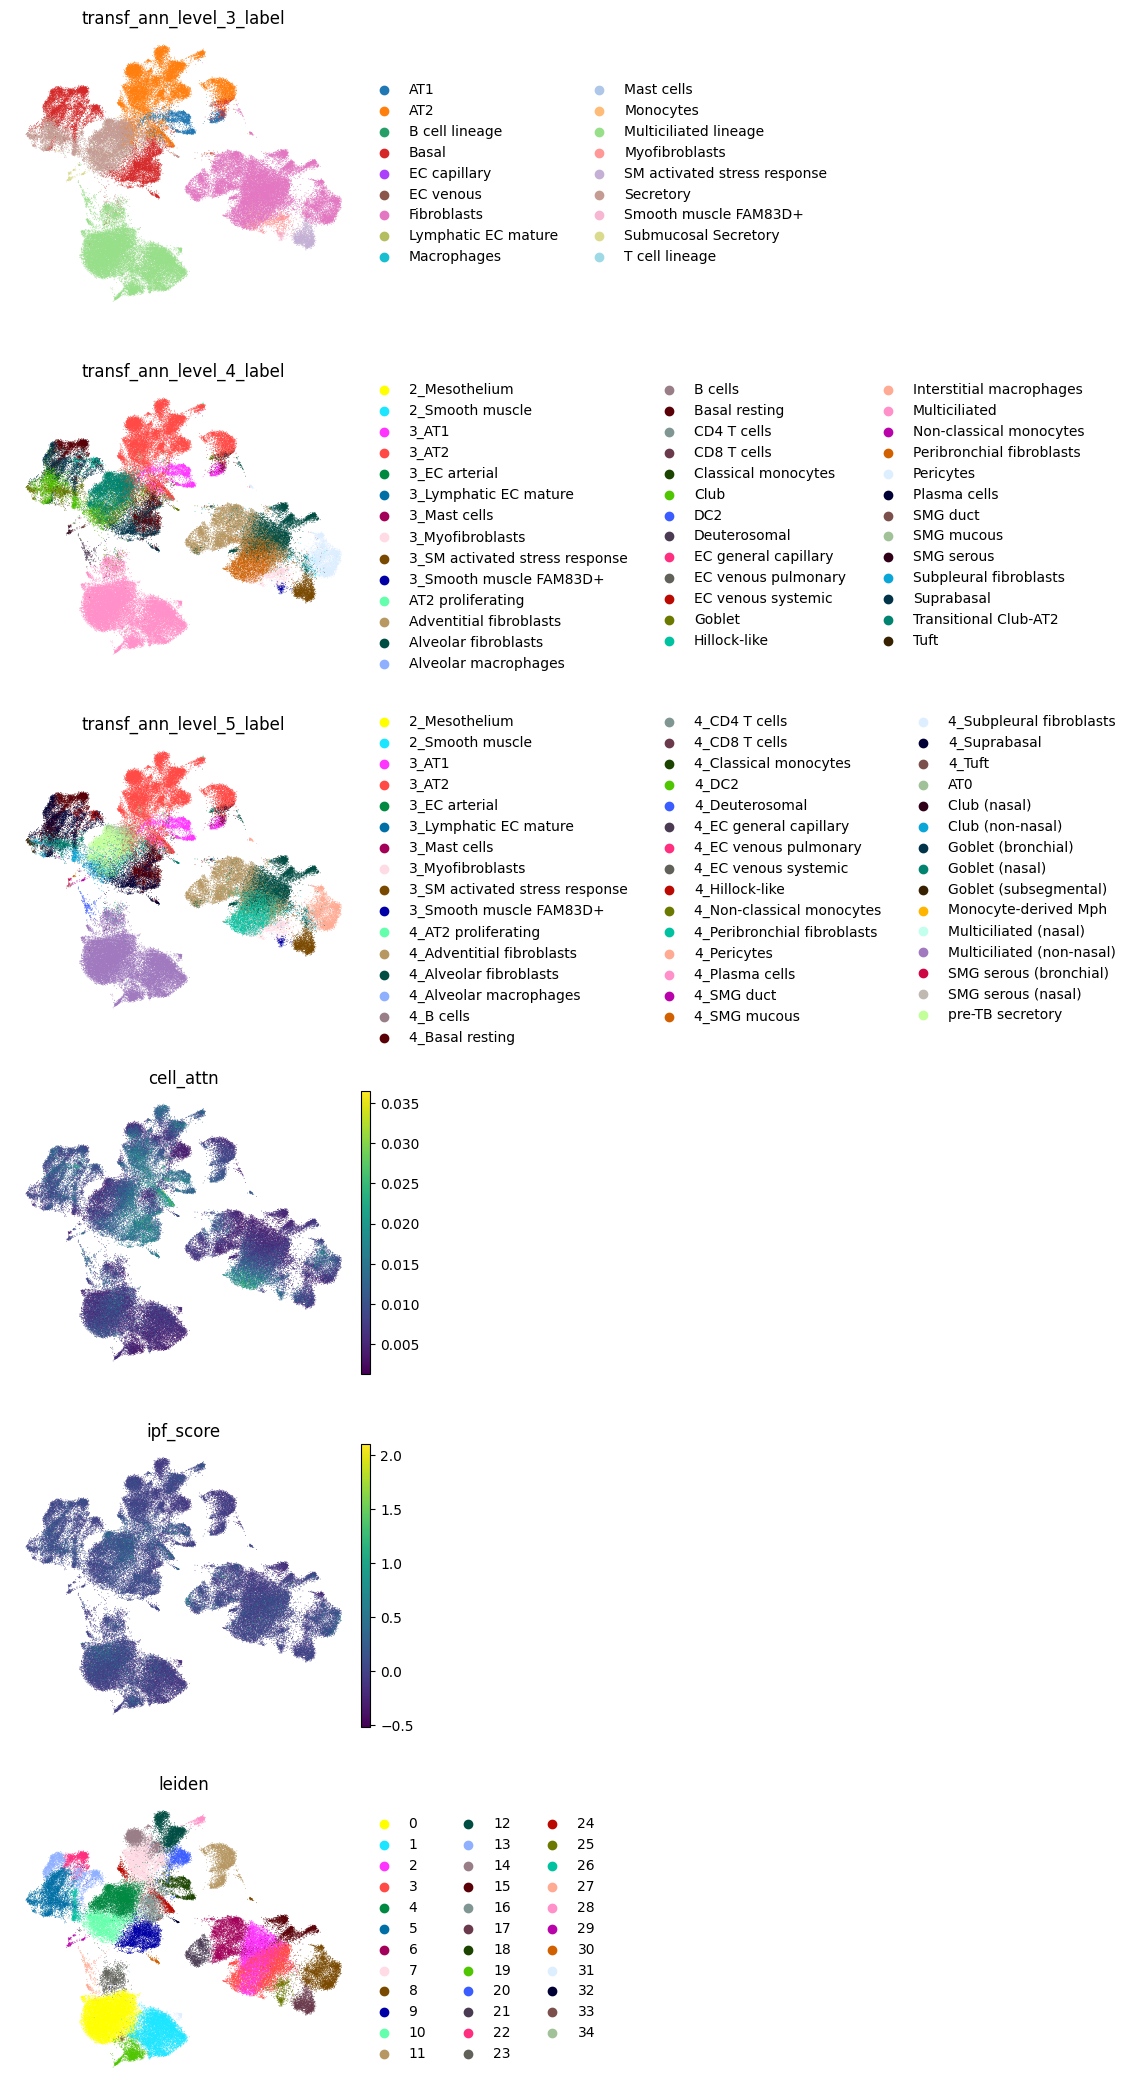

In [28]:
sc.pl.umap(
    adata_subset, 
    color=['transf_ann_level_3_label', 'transf_ann_level_4_label', 'transf_ann_level_5_label', 'cell_attn', 'ipf_score', 'leiden'],
    ncols=1,
    frameon=False,
)

In [29]:
df = adata_subset.obs[['cell_attn', 'ipf_score', 'leiden']]
df

,cell_attn,ipf_score,leiden
ILD60-2_ACGAGGAAGCCAGAAC_haberman,0.004369,-0.081114,0
ILD61-1_AGGGAGTTCCGCTGTT_haberman,0.012581,-0.074282,7
F01379_GGACGTCGTACACCGC_haberman,0.010969,-0.096858,0
ILD59-2_CCATTCGCAATGGATA_haberman,0.016203,0.042008,7
TGGAGAGTCATGTCAG-1_DD046Q_tata_unpubl,0.009473,0.114299,9
...,...,...,...
135I-a_CCACCTAAGAAGGCCT_adams,0.007781,-0.026306,10
123I_AAGGTTCGTATGCTTG_adams,0.007385,-0.090311,1
TTAACTCGTAATAGCA-WSSS8015051-0_meyer_unpubl,0.007661,-0.165239,2
QZY9VQng_TTAGGACAGCTAGGCA-1_lukassen,0.005993,0.107669,11


<Axes: xlabel='leiden'>

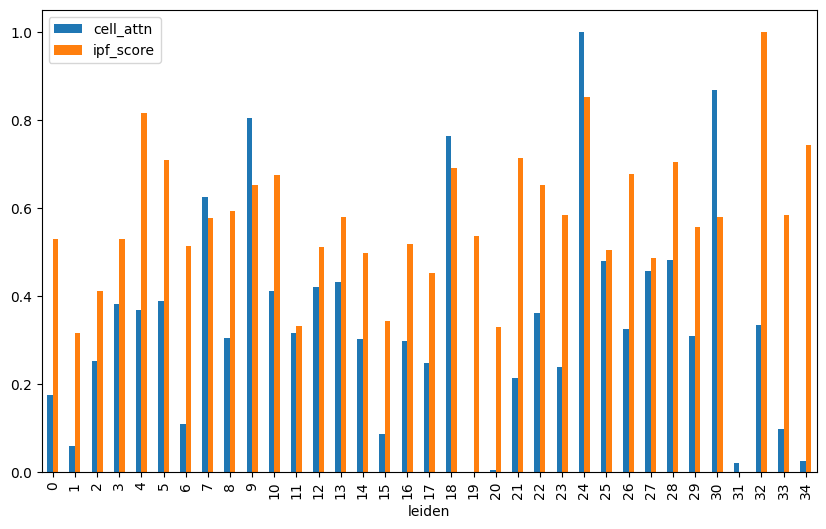

In [30]:
df_groups = df.groupby(['leiden']).agg('mean')
# min-max normalize
df_groups = (df_groups-df_groups.min())/(df_groups.max()-df_groups.min())

#create bar plot with custom aesthetics
df_groups.plot(kind='bar', figsize=(10, 6))